### Simulates copy number sequences through the TSMHMM model, clusters the data using a GMM and plots the associated lower bound for different K

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.mixture
import simul
import os

from utils.config import Config

/Users/haraldme/miniconda3/envs/victree/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/haraldme/miniconda3/envs/victree/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/haraldme/miniconda3/envs/victree/lib/python3.10/site-

In [3]:
true_K = 10
M = 3000
N = 500
A = 7
config = Config(n_nodes=true_K, n_cells=N, chain_length=M, n_states=A)
output_simul = simul.simulate_full_dataset(config, store_anndata=False)
CN_profiles = output_simul['c']
cell_to_clone_assignments = output_simul['z']
observations = np.zeros((N, M))
for n in range(N):
    observations[n, :] = CN_profiles[cell_to_clone_assignments[n]].numpy()

In [ ]:
observations

In [5]:
import sklearn
K_list = np.arange(5, 20)
elbo_list = []
hmm_states = observations
for K in K_list:
    cluster_alg = sklearn.mixture.GaussianMixture(n_components=K, covariance_type="diag", n_init=10)
    cluster_alg.fit(hmm_states)
    labels = cluster_alg.predict(hmm_states)
    elbo_list.append(cluster_alg.lower_bound_)

/Users/haraldme/miniconda3/envs/victree/lib/python3.10/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  .fit(X)
/Users/haraldme/miniconda3/envs/victree/lib/python3.10/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  .fit(X)
/Users/haraldme/miniconda3/envs/victree/lib/python3.10/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  .fit(X)
/Users/haraldme/miniconda3/envs/victree/lib/python3.10/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  .fit(X)
/Users/haraldme/miniconda3/envs/victree/lib/python3.

In [15]:
idx_true_K = np.where(K_list == true_K)[0][0]
print(f"ELBO at true K: {elbo_list[idx_true_K]}")
print(f"ELBO at true K+1: {elbo_list[idx_true_K + 1]}")
print(f"ELBO at true K-1: {elbo_list[idx_true_K - 1]}")

ELBO at true K: 17964.2764092863
ELBO at true K+1: 17964.2764092863
ELBO at true K-1: 15636.06785531906


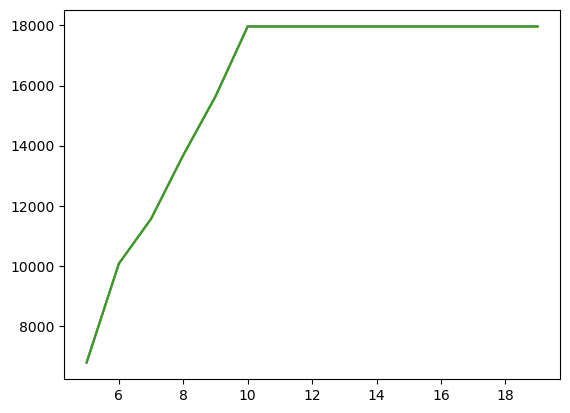

In [11]:
%matplotlib inline
plt.plot(K_list, elbo_list)
plt.show()